<a href="https://colab.research.google.com/github/mch60131242/Home/blob/main/KNN%2C_Regression(%EC%98%88%EC%B8%A1%2C%ED%9A%8C%EA%B7%80).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
import numpy as np
# 지도학습은 정답을 제공하고 그것을 분류하게 하는 문제
# 강화학습을 배우지 않는 이유는 지금 단계에서 너무 어려워서 강화학습은 지금의 학습 레벨의 다음 단계 신경망의 이해 인공지능의 이해
# 예측오차와 평균오차, 예측선
  

In [2]:
perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0])
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

In [3]:
print(perch_length.shape, perch_weight.shape)

(56,) (56,)


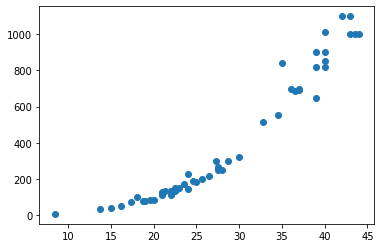

In [4]:
import matplotlib.pyplot as plt
plt.scatter(perch_length,perch_weight)
plt.show()

In [5]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(perch_length,perch_weight, random_state=42)

In [6]:
print(train_input.shape, test_input.shape ,train_target.shape, test_target.shape)  ## 현재 지금 모든 배열이 1차원 배열 하지만 sklearn에게는 1개의 열이 존재하는 2차원 배열로 제공해야한다.

(42,) (14,) (42,) (14,)


In [16]:
train_input = train_input.reshape(-1,1) # reshape(행의수,열의수)
test_input = test_input.reshape(-1,1) # 열이 하나인 형태로 만들어줘라


In [24]:
from sklearn.neighbors import KNeighborsRegressor

knr = KNeighborsRegressor() 
knr.fit(train_input,train_target)
knr.score(test_input, test_target)

0.992809406101064

In [26]:
from sklearn.metrics import mean_absolute_error  ##metrics는 평가지표를 모아두는곳 mean_absoulte_error <- 평균 절대값 오차

test_prediction = knr.predict(test_input)
mae = mean_absolute_error(test_target, test_prediction)  ## 오차가 19 정도
print(mae)


19.157142857142862


In [27]:
knr.score(train_input, train_target)
knr.score(test_input, test_target)   ## 일반적으로 트레인보다 test가 더 낮아야 정상 이것은 훈련세트의 과대적합을 이야기한다. overfit 즉 훈련세트에만 잘 맞는 모델이라 실전 투입에 문제가 생길 수 있다.
# 모델이너무 단순하여 문제가 생긴다


0.992809406101064

In [ ]:
#

In [32]:
knr.n_neighbors= 3
knr.fit(train_input, train_target)
knr.score(train_input, train_target)

knr.score(test_input, test_target)
print(knr.score(test_input, test_target))


0.9746459963987609


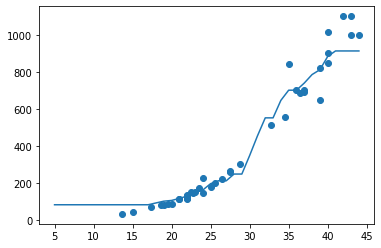

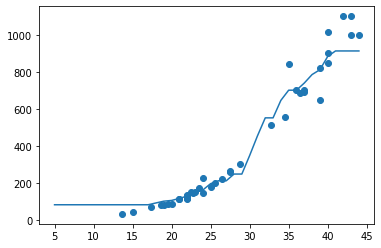

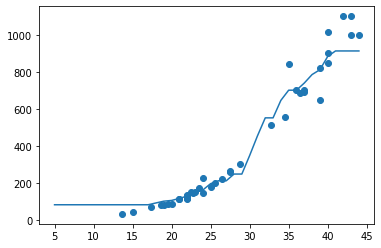

In [55]:
# k-최근접 이웃 회귀 객체를 만듭니다
knr = KNeighborsRegressor()
# 5에서 45까지 x 좌표를 만듭니다
x = np.arange(5, 45).reshape(-1, 1)
# n = 1, 5, 10일 때 예측 결과를 그래프로 그립니다.
for n in [1, 5, 10]:
    # 모델 훈련
    knr.n_neighbors = n
    knr.fit(train_input, train_target)
    # 지정한 범위 x에 대한 예측 구하기 
    #prediction = knr.predict(x)
    #print(x)
    #print(prediction)
    # 훈련 세트와 예측 결과 그래프 그리기
    plt.scatter(train_input, train_target)
    plt.plot(x, prediction)
    #plt.title('n_neighbors = {}'.format(n))    
    #plt.xlabel('length')
    #plt.ylabel('weight')
    plt.show()